# W7: Uncertainty and P-Values - Solutions

This week we are going to focus on interpreting standard errors, t-statistics, and p-values. By the end of this notebook, you should have a better understanding of what p-values mean and do not mean. 

We will be using data wherein students were randomly assigned to tutoring. The dataset has two main variables: 
- **`Mentored`**: `TRUE` if the student participated in tutoring, `FALSE` if the student did not participate in tutoring
- **`Final`**: Each student's final score in the course 

In [1]:
#begin by loading the estimatr package and the dataset 
library(estimatr) 
data <- read.csv("final_scores.csv")
head(data)

,Mentored,Final
,<lgl>,<dbl>
1,FALSE,82
2,FALSE,82
3,FALSE,82
4,FALSE,82
5,FALSE,82
6,TRUE,82


To explain the relationship between the standard deviation and the standard error, I will first show you what a sampling distribution is. In the code chunks below, calculate the mean and standard deviation of the final scores. 

In [10]:
mean.score <- mean(data$Final) #replace NULL with your code 
mean.score 

sd.score <- sd(data$Final) #replace NULL with your code 
sd.score 

[1] 62.43841

[1] 25.71275

The standard deviation tells us the spread of the final scores in the class whereas the mean tells us the average score in the class. 

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.2.1     ✔ dplyr   1.1.4
✔ tidyr   1.3.1     ✔ stringr 1.5.1
✔ readr   2.1.5     ✔ forcats 1.0.0
✔ purrr   1.0.2     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] 2.65111

[1] 62.3668

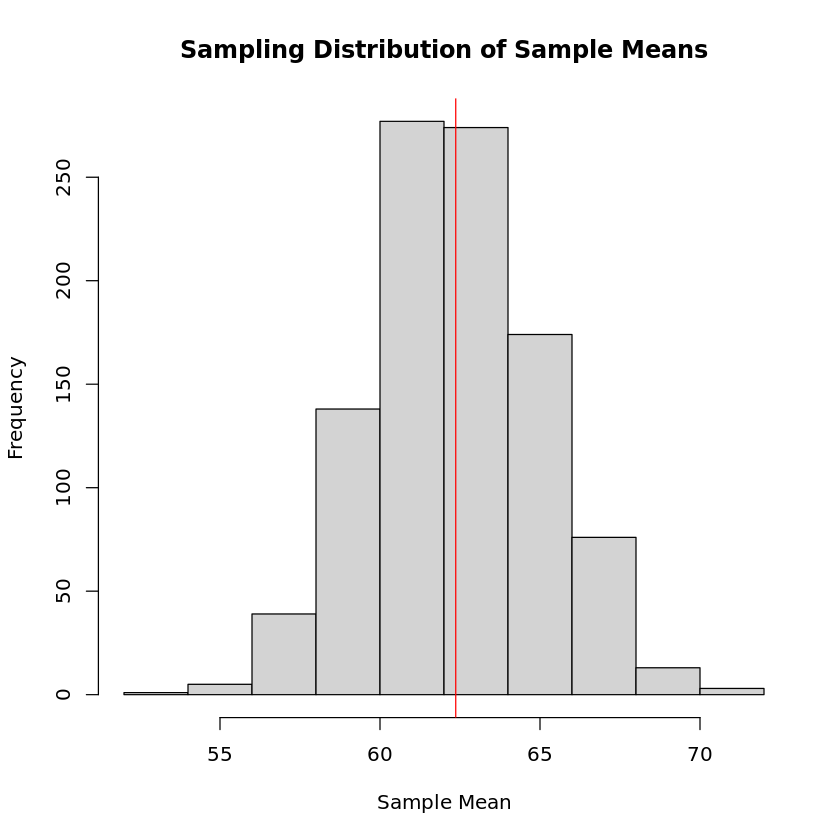

In [11]:
# you do not have to understand the code below; run the cells and I will explain the output 
library(tidyverse)
set.seed(94608) #makes sure results are same across all laptops
mean.function <- function(x){
    sample <- sample_n(x, 100, replace = TRUE)
    mean.sample <- mean(sample$Final)
    return(mean.sample)
}
sample.means <- replicate(1000, mean.function(data))

hist(sample.means, 
    main = "Sampling Distribution of Sample Means",
    xlab = "Sample Mean",
    ylab = "Frequency")
abline(v = mean(sample.means), col = "red")

std.error <- sd(sample.means)
std.error

mean.sampling.dist <- mean(sample.means) 
mean.sampling.dist

What I did here is: 
- I created a function that takes a sample of size 100 from the final scores of students and calculates the mean of each sample
- I then repeated the process 1000 times and stored the results in `sample.means` (1000 sample means)
- I plotted the distribution of those sample means - this is called a sampling distribution
- I then took the standard error of that sampling distribution

Compare the mean of the sampling distribution to the mean in our data. What do you observe?

## Standard Error

What is the standard error of the sample below? Let's find the standard error using a sample of final scores we take below (`our.sample$Final`).

$$Standard Error = \sqrt{\frac{s^2_1}{n_1} + \frac{s^2_2}{n_2}}$$

In [12]:
our.sample <- sample_n(data, 100, replace = TRUE) 

#calculate the following using the sd() and length() functions
s1 <- sd(our.sample$Final[our.sample$Mentored == TRUE]) #standard dev for tutored
s1
s2 <- sd(our.sample$Final[our.sample$Mentored == FALSE]) #standard dev for not tutored
s2
n1 <- length(our.sample$Final[our.sample$Mentored == TRUE]) #sample size of tutored, using the length function
n1
n2 <- length(our.sample$Final[our.sample$Mentored == FALSE]) #sample size of not tutored, using the length function
n2

#mathematically calculate using the formula above 
#hint: use sqrt() to calculate the square root 
se <- sqrt((s1^2/n1) + 
               (s2^2/n2)) 
se

[1] 17.60168

[1] 26.38984

[1] 40

[1] 60

[1] 4.399152

## Statistical Significance

Let's say we want to know whether assignment to tutoring improved students' final scores in the course. 

What is our null hypothesis? What is our alternative hypothesis? 

- **Null hypothesis:** There is no difference in the final scores of the students who were tutored and not tutored.
- **Alternative hypothesis:** There is a difference in the final scores of students who were tutored and not tutored.

First, manually calculate the difference in means, the standard error (using the formula above), and the t-statistic for the final scores between students who were and were not tutored in the course. 

In [13]:
diff.in.means <- mean(data$Final[data$Mentored == TRUE]) - mean(data$Final[data$Mentored == FALSE])
se.dim <- sqrt((sd(data$Final[data$Mentored == TRUE])^2/length(data$Final[data$Mentored == TRUE])) + 
               (sd(data$Final[data$Mentored == FALSE])^2/length(data$Final[data$Mentored == FALSE])))
t.stat <- diff.in.means/se.dim

diff.in.means
se.dim
t.stat

[1] 18.70845

[1] 1.180301

[1] 15.85057

Now, using the `difference_in_means()` function, check your calculations. You should get the same difference in means (estimate), standard error, and t-statistic. 

In [14]:
difference_in_means(Final ~ Mentored, data, condition1 = FALSE, condition2 = TRUE) 

Design:  Standard 
         Estimate Std. Error  t value     Pr(>|t|) CI Lower CI Upper       DF
Mentored 18.70845   1.180301 15.85057 1.684749e-52 16.39327 21.02363 1526.994

We observe a p-value of nearly 0. What does this mean? 
- It means, if the null hypothesis were true, there is a nearly 0 percent chance of observing a difference in means as extreme or more extreme than the one we observed.

Can you think of another way to confirm your results? (**Hint**: Think about the t-statistic)
- We can confirm these results by looking at the t-statistic, which is much larger than 1.96. 

In [9]:
# showing a p-value through simulations 
re.randomize <- function(input.data) {
    input.data$Mentored <- sample(input.data$Mentored)
    return(input.data)
}
head(re.randomize(data))

compute.effect <- function(input.data) {
    estimate <- difference_in_means(Final ~ Mentored, input.data,
                                    condition1 = FALSE, condition2 = TRUE)$coefficients
    return(as.numeric(estimate))
}

actual.estimate <- compute.effect(data)
actual.estimate

simulations <- replicate(1000, compute.effect(re.randomize(data)))

,Mentored,Final
,<lgl>,<dbl>
1,TRUE,82
2,FALSE,82
3,TRUE,82
4,TRUE,82
5,TRUE,82
6,TRUE,82


[1] 18.70845

Warning message:
“`qplot()` was deprecated in ggplot2 3.4.0.”


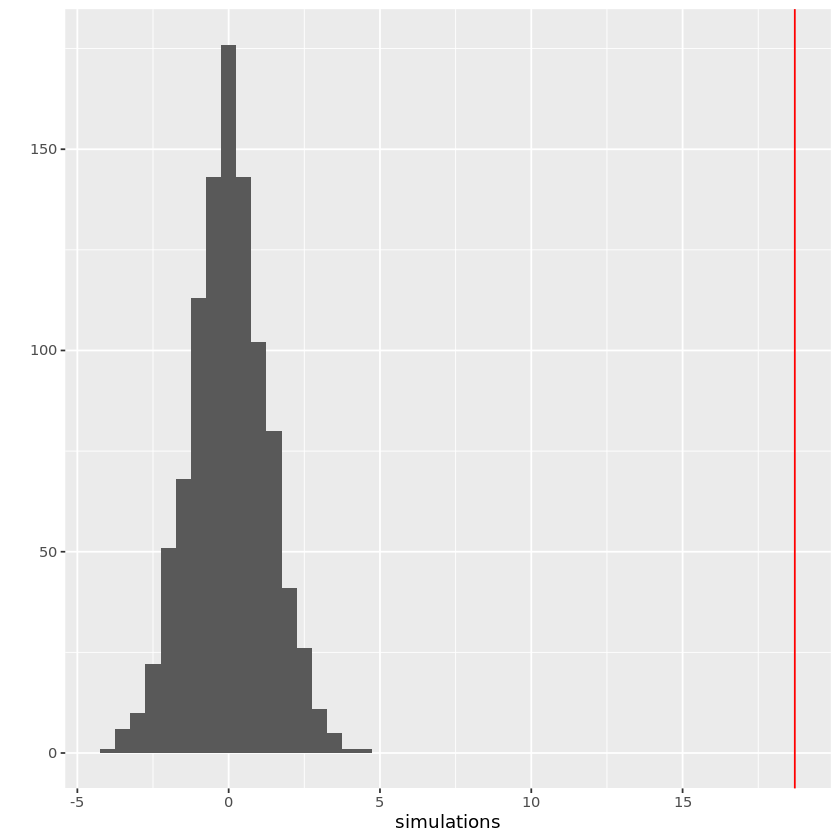

In [3]:
library(ggplot2)
qplot(simulations, binwidth = .5) + geom_vline(xintercept = actual.estimate, color = 'red')

In [4]:
simulations.at.least.as.large <- subset(simulations, simulations > actual.estimate)
length(simulations.at.least.as.large)
length(simulations)
length(simulations.at.least.as.large) / length(simulations) #p-value

[1] 0

[1] 1000

[1] 0